In [14]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
# from copulae1 import *
# from KDEs import *
# from toolbox import *
import warnings
import itertools
import os
import ruptures as rpt

In [199]:
!ls ../../results/

BBT_Tiingo            BBT_future_Tiingo_eth coingecko_future_v5
BBT_future_BITW100    BBT_future_Tiingo_ltc future_brr_new
BBT_future_BITW20     BBT_future_Tiingo_xrp future_brr_new_v5
BBT_future_BITW70     CRIX_future_Open_v3   future_brr_v3
BBT_future_BITX       CRIX_future_v3        future_brr_v4
BBT_future_CRIX       coingecko_future_v1   future_brr_v5
BBT_future_Tiingo_ada coingecko_future_v3


In [201]:
!ls ../../results/BBT_future_Tiingo

ls: ../../results/BBT_future_Tiingo: No such file or directory


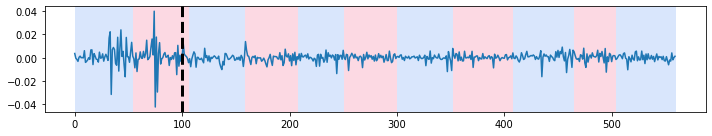

In [211]:
# data = pd.read_csv('../../results/BBT_future_Tiingo_eth/MM/rh_ES q=0.05_copula_selection.csv')
data = pd.read_csv('../../results/BBT_Tiingo/MM/rh_ES q=0.01_copula_selection.csv')

data.sort_values('Date', inplace=True)
data.reset_index( drop=True, inplace=True)
data.Date = pd.to_datetime(data.Date)

signal = np.array(data.rh)

n_samples, dim, sigma = len(signal), 1, np.std(signal)
n_bkps = 10  # number of breakpoints
_, bkps = rpt.pw_constant(n_samples, dim, n_bkps, noise_std=sigma)

algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=3)
# model = "l2"  
# algo = rpt.Window(width=50, model=model).fit(signal)
# result = algo.predict(n_bkps=n_bkps)

rpt.display(signal, bkps, result)
plt.show()

2019-08-02 20:00:00+00:00


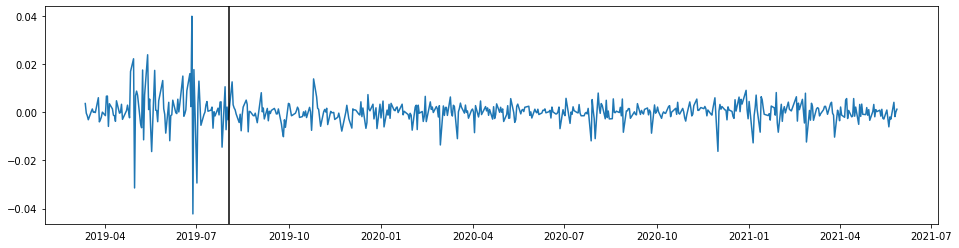

In [212]:
plt.figure(figsize=(16,4))
plt.plot(data.Date, signal)

for i in result[:-1]:
    print(data.Date[i])
    plt.axvline(x = data.Date[i], color='black')